<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="left"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

In [1]:
import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
import statsmodels.formula.api as sm

import warnings
warnings.simplefilter('ignore')

# Modelo K-Nearest Neighbor (KNN)

O algoritmo dos k-vizinhos mais próximos (k-NN) é um algoritmo de aprendizado de máquina usado para classificação. O KNN classifica cada valor de um conjunto de dados avaliando sua distância em relação aos k vizinhos mais próximos. Se os k vizinhos mais próximos forem majoritariamente de uma classe, a amostra em questão será classificada nesta categoria. A ideia é a seguinte:



<img src="http://www.orlandoalbarracin.com.br/phyton/knn.png" width=850, align="left">

<font size =5 > Algoritmo KNN </font>

1.   Selecione o dado a ser classifica, meça sua distância (euclidiana) em relação a cada um dos outros dados que já estão classificados;
1.   Selecione os primeros k dados com menores distâncias;
1.   Verifique as classes (ou categorias) dos dados que tiveram as k menores distâncias e conte a quantidade de vezes que cada classe que apareceu;
1.   Classifique esse novo dado como pertencente à classe que mais apareceu.

# Exemplo
Utilizaremos um exemplo bastante simples com o objetivo de facilitar a compreensão do modelo. Neste exemplo, a classificação do 'Tipo de Taxa de Empréstimo', que pode ser Padrão ou Não, é determinada com base em apenas dois atributos: a idade do cliente e o valor do empréstimo

In [2]:
Loans=pd.read_excel("http://www.orlandoalbarracin.com.br/phyton/Loan.xlsx")
Loans.head()

,Age,Loan,Duration,Type_loan
0,50,49584,Long,0
1,48,49809,Short,0
2,36,50070,Long,0
3,44,51155,Undefined,0
4,53,50595,Short,0


In [3]:
Loans.shape

(100, 4)

In [4]:
# Dados de entrada/saída
X = Loans[['Age','Loan']]
y = Loans[["Type_loan"]]

#Criando dummies
dummies = pd.get_dummies(Loans["Duration"])

# Normalizando os dados
X_padronizados = (X-X.mean())/X.std()
X_padronizados = pd.concat([X, dummies],axis=1) #adicionando dummies

# Treinamento/teste
X_train, X_test, y_train, y_test = train_test_split(X_padronizados,y,test_size=0.3, random_state = 1)

# Definindo ou declarando o modelo
k=3
clf = neighbors.KNeighborsClassifier(k)


# Aprendizado (Emprega o conjunto de treinamento)
clf.fit(X_train, y_train)

# Testando o modelo
y_pred = clf.predict(X_test)

# Avaliando o modelo
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[18,  1],
       [ 2,  9]])

In [5]:
# Avaliando a acuracia do modelo

verdadeiro_positivo = cnf_matrix[0][0]
verdadeiro_negativo = cnf_matrix[1][1]

falso_positivo = cnf_matrix[0][1] # erro tipo 1
falso_negativo = cnf_matrix[1][0] # erro tipo 2

acertos = verdadeiro_positivo + verdadeiro_negativo
erros = falso_positivo + falso_negativo

print('Erros   : ', erros)
print('Acertos : ',acertos)
print('--------')
print('Porcentagem de acertos : ', acertos/(acertos+erros)*100, "%")

Erros   :  3
Acertos :  27
--------
Porcentagem de acertos :  90.0 %


# Exercícios Palmer Penguins!


A base de dados "Palmer Penguins" contém informações sobre pinguins coletadas na Península de Palmer, na Antártica. Aqui está uma descrição das colunas presentes neste conjunto de dados:

- species: A espécie do pinguim
- island: A ilha onde o pinguim foi observado
- bill_length_mm: O comprimento do bico do pinguim em milímetros.
- bill_depth_mm: A profundidade do bico do pinguim em milímetros.
- flipper_length_mm: O comprimento da nadadeira do pinguim em milímetros.
- body_mass_g: A massa corporal do pinguim em gramas.
- sex: O sexo do pinguim.

In [6]:
df = pd.read_csv("https://pos.it/palmer-penguins-github-csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [7]:
# Valores nulos
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [8]:
# Dados sem valores nulos
df = df.dropna()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [9]:
print(f"shape dataframe: rows = {df.shape[0]} and columns = {df.shape[1]}")

shape dataframe: rows = 333 and columns = 8


### 1. Na base de dados, podemos identificar quantos e quais tipos de espécies diferentes de pinguins?

In [10]:
df['species'].value_counts()


Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

### 2. Quais são as características do pinguim com a maior massa corporal (body mass)? E quais são as características do pinguim com a menor massa corporal (body mass)?

In [11]:
# Pingium with body mass maximum
df[df['body_mass_g']==df['body_mass_g'].max()]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
169,Gentoo,Biscoe,49.2,15.2,221.0,6300.0,male,2007


In [12]:
# Pingium with body mass minimum
df[df['body_mass_g']==df['body_mass_g'].min()]


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
314,Chinstrap,Dream,46.9,16.6,192.0,2700.0,female,2008


### 3. Considerando apenas os pinguins do ano de 2008, quantos exemplares existem de cada espécie? E quantos deles são machos e quantos são fêmeas?

In [13]:
pinguins_2008 = df[df['year'] == 2008]
pinguins_2008.head()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
50,Adelie,Biscoe,39.6,17.7,186.0,3500.0,female,2008
51,Adelie,Biscoe,40.1,18.9,188.0,4300.0,male,2008
52,Adelie,Biscoe,35.0,17.9,190.0,3450.0,female,2008
53,Adelie,Biscoe,42.0,19.5,200.0,4050.0,male,2008
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,female,2008


In [14]:
pinguins_2008['species'].value_counts()

Adelie       50
Gentoo       45
Chinstrap    18
Name: species, dtype: int64

In [15]:
pinguins_2008['sex'].value_counts()

male      57
female    56
Name: sex, dtype: int64

### 4. Faça um gráfico scatterplot a relação entre as variáveis bill_length_mm e	bill_depth_mm, mostre com cores diferentes as especies.

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

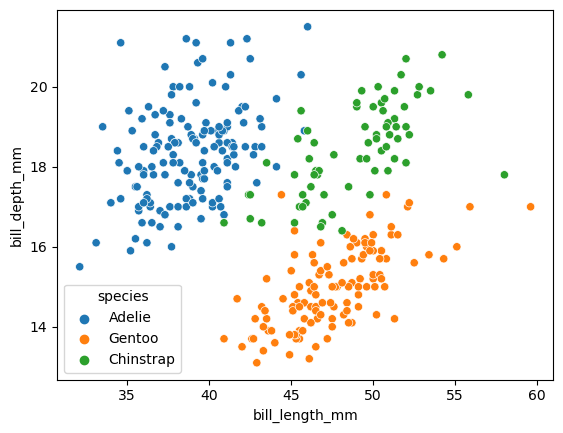

In [16]:
sns.scatterplot(data=df, x='bill_length_mm', y='bill_depth_mm', hue='species')

### 5. Faça um gráfico scatterplot a relação entre as variáveis flipper_length_mm	body_mass_g, mostre com cores diferentes as especies.

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

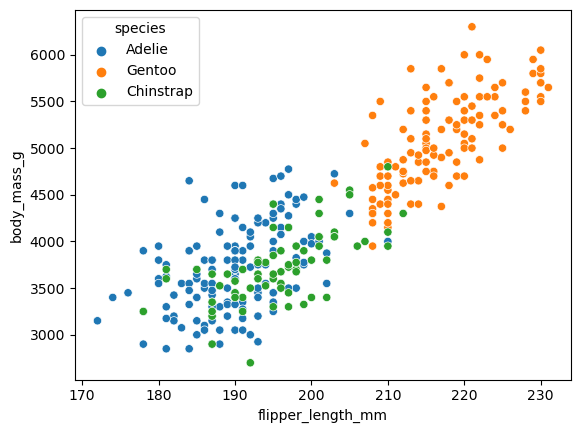

In [17]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species')


### 6. Ajuste um modelo de k vizinhos próximos para classificar as especies dos pinguins considerando como variáveis explicativas: `bill_length_mm,	bill_depth_mm,	flipper_length_mm	, body_mass_g e	sex.` Use 70% dos dados para treinar o modelo. No código use random_state = 1.

Considere 3 vizinhos próximos.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [19]:
X = df[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']]
y = df['sex']

In [20]:
# Normalization
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [21]:
#Train Model and Predict
k = 3  
knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(f"Accuracy of model at K={k} is {metrics.accuracy_score(y_test, y_pred)}")

Accuracy of model at K=3 is 0.88


### 7. Com os dados selecionados para testar o modelo, determine a quantidade de acerto e erros?

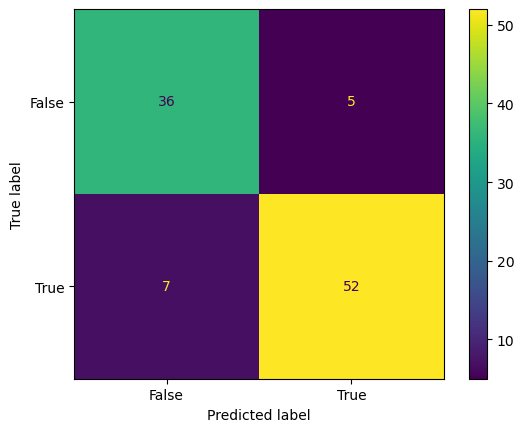

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.grid(False)
plt.show()


### 8. Repita o o modelo k-vizinhos considerando 4,  5 e 6 vizinhos próximos. Qual apresentou melhores resultados?

In [26]:

def knn_model(k=k):
    knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    print(f"Accuracy of model at K={k} is {metrics.accuracy_score(y_test, y_pred)}")

for k in range(4,7):
    knn_model(k)

Accuracy of model at K=4 is 0.88
Accuracy of model at K=5 is 0.92
Accuracy of model at K=6 is 0.91


### 9. Usando o modelo k-vizinho com melhores resultados. classifique um pinguim com as seguintes características:

bill_length_mm:41.7

bill_depth_mm: 20.3

flipper_length_mm:193.0

body_mass_g:3100.0

sex: male


In [27]:
knn = KNeighborsClassifier(n_neighbors = 6).fit(X_train,y_train)
y_pred = knn.predict(X_test)

new_value=pd.DataFrame({'bill_length_mm':    [41.7],
                        'bill_depth_mm':     [20.3],
                        'flipper_length_mm': [193.0],
                        'body_mass_g':       [3100.0]
                        })

knn.predict(new_value)


array(['male'], dtype=object)